**By Philip Abraham**  
*Date: December 6, 2021*

# Introduction

Gershunov and his co-authors actually see, on average, a decrease in the frequency of Santa Anas, according to their paper. They predict the frequency of Santa Ana wind events will drop by an average of 18 percent by the end of the 21st century, largely because the Great Basin will have fewer days of the cold weather that is necessary to form the winds.  

Though that may sound like good news, it's not. The Santa Anas still will have a busy period, as they do now, and it'll come in the peak of a later, possibly longer wildfire season. That peak will shift from October into November and the early winter months, which could, the authors write, provide "opportunities for wildfires to burn longer and bigger."

# Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

import warnings;
warnings.filterwarnings('ignore');

In [2]:
df = pd.read_csv('df.csv', parse_dates=['DATE'], index_col='DATE')

# set categorical order
df['HourlyWindDirectionTier'] = pd.Categorical(
    df['HourlyWindDirectionTier'],
    categories=['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'Variable'],
    ordered=True)

MonthLabels = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]
df['Month'] = pd.Categorical(df['Month'], categories=MonthLabels, ordered=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584510 entries, 1973-01-01 00:00:00 to 2021-06-30 04:53:00
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   HourlyDewPointTemperature  584510 non-null  float64 
 1   HourlyDryBulbTemperature   584510 non-null  float64 
 2   HourlyPrecipitation        420173 non-null  float64 
 3   HourlyRelativeHumidity     584510 non-null  float64 
 4   HourlySeaLevelPressure     584510 non-null  float64 
 5   HourlyVisibility           512731 non-null  float64 
 6   HourlyWetBulbTemperature   414148 non-null  float64 
 7   HourlyWindDirection        584510 non-null  float64 
 8   HourlyWindSpeed            584510 non-null  float64 
 9   Year                       584510 non-null  int64   
 10  Month                      584510 non-null  category
 11  WeekY                      584510 non-null  int64   
 12  DayY                       584510 non-

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584510 entries, 1973-01-01 00:00:00 to 2021-06-30 04:53:00
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   HourlyDewPointTemperature  584510 non-null  float64 
 1   HourlyDryBulbTemperature   584510 non-null  float64 
 2   HourlySeaLevelPressure     584510 non-null  float64 
 3   HourlyWindDirection        584510 non-null  float64 
 4   HourlyWindSpeed            584510 non-null  float64 
 5   Year                       584510 non-null  int64   
 6   Month                      584510 non-null  category
 7   WeekY                      584510 non-null  int64   
 8   DayY                       584510 non-null  int64   
 9   Hour                       584510 non-null  int64   
 10  HourlyWindDirectionTier    584510 non-null  category
dtypes: category(2), float64(5), int64(4)
memory usage: 45.7 MB


In [3]:
df.drop(['HourlyPrecipitation','HourlyRelativeHumidity','HourlyVisibility','HourlyWetBulbTemperature'],axis=1, inplace=True)

In [4]:
df.head(3)

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Year,Month,WeekY,DayY,Hour,HourlyWindDirectionTier
DATE,,,,,,,,,,,
1973-01-01 00:00:00,14.0,57.0,30.12,20.0,14.0,1973,January,1,1,0,NE
1973-01-01 01:00:00,12.0,56.0,30.12,20.0,16.0,1973,January,1,1,1,NE
1973-01-01 02:00:00,12.0,55.0,30.13,20.0,13.0,1973,January,1,1,2,NE


In [5]:
df.tail(3)

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Year,Month,WeekY,DayY,Hour,HourlyWindDirectionTier
DATE,,,,,,,,,,,
2021-06-30 02:53:00,59.0,64.0,29.87,160.0,5.0,2021,June,26,181,2,SE
2021-06-30 03:53:00,60.0,64.0,29.88,140.0,6.0,2021,June,26,181,3,SE
2021-06-30 04:53:00,60.0,64.0,29.89,160.0,5.0,2021,June,26,181,4,SE


In [59]:
df.head()

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyWindDirection,HourlyWindSpeed,Year,Month,WeekY,DayY,Hour,HourlyWindDirectionTier
DATE,,,,,,,,,,,
1973-01-01 00:00:00,14.0,57.0,30.12,20.0,14.0,1973,January,1,1,0,NE
1973-01-01 01:00:00,12.0,56.0,30.12,20.0,16.0,1973,January,1,1,1,NE
1973-01-01 02:00:00,12.0,55.0,30.13,20.0,13.0,1973,January,1,1,2,NE
1973-01-01 03:00:00,12.0,55.0,30.14,360.0,15.0,1973,January,1,1,3,N
1973-01-01 04:00:00,13.0,54.0,30.14,20.0,14.0,1973,January,1,1,4,NE


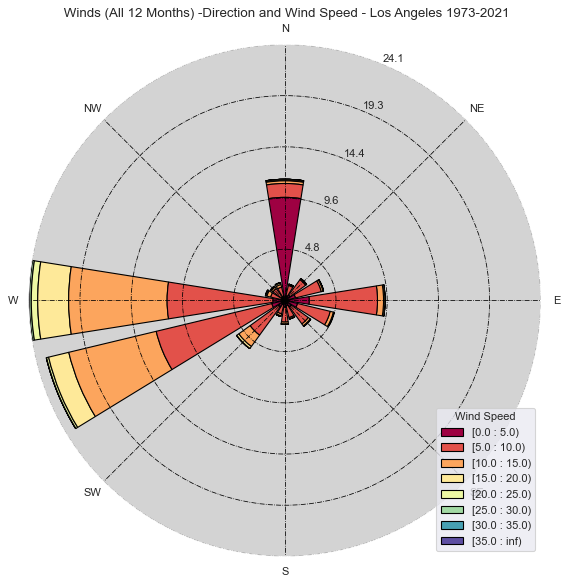

In [60]:
# plot windroses for All Months
from windrose import WindroseAxes
from matplotlib import cm

bins_Range = np.arange(0, 40, 5)
ax = WindroseAxes.from_ax()
ax.bar(df.HourlyWindDirection,
       df.HourlyWindSpeed,
       normed=True,
       opening=0.8,
       edgecolor='black',
       bins=bins_Range,
       cmap=cm.Spectral)
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
plt.title(
    ' Winds (All 12 Months) -Direction and Wind Speed - Los Angeles 1973-2021')
ax.set_legend()
ax.set_facecolor("lightgrey")
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.legend(loc=4, title="Wind Speed")
plt.show()

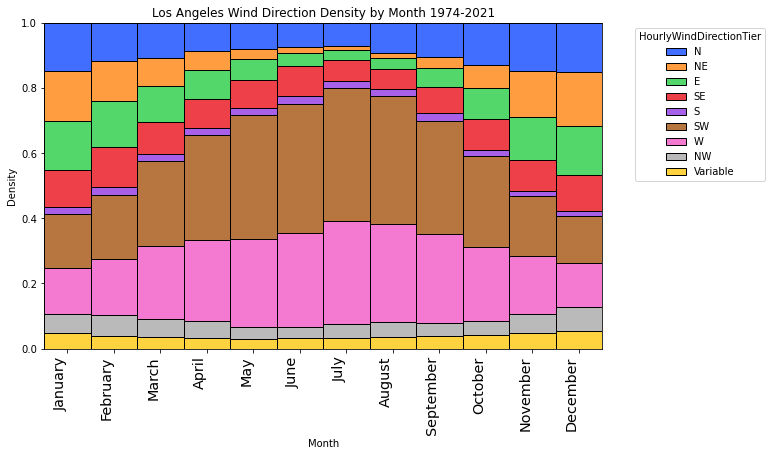

In [7]:
# Wind Direction by Month - Density plot
plt.figure(figsize=(10, 6))
sns.set_palette("bright")
ax = sns.histplot(binwidth=0.5,
                  x="Month",
                  hue="HourlyWindDirectionTier",
                  data=df,
                  stat="density",
                  multiple="fill")
ax.legend(handles=ax.legend_.legendHandles,
          labels=[t.get_text() for t in ax.legend_.texts],
          title=ax.legend_.get_title().get_text(),
          bbox_to_anchor=(1.05, 1),
          loc='upper left')
plt.xticks(rotation=90,
           horizontalalignment='right',
           fontweight='light',
           fontsize='x-large')
plt.title('Los Angeles Wind Direction Density by Month 1974-2021')
plt.show()

In [8]:
# Santa Ana Winds (SAW) months
dfSAW = df[(df.Month=='September')|(df.Month=='October')|(df.Month=='November')|(df.Month=='December')|(df.Month=='January')|(df.Month=='February')|(df.Month=='March')|(df.Month=='April')|(df.Month=='May')]

# Non-Santa Ana Winds (NSAW) months
dfNSAW = df[(df.Month=='June')|(df.Month=='July')|(df.Month=='August')]

In [57]:
pd.crosstab(df.Month,df.HourlyWindDirectionTier)

HourlyWindDirectionTier,N,NE,E,SE,S,SW,W,NW,Variable
Month,,,,,,,,,
January,7323,7616,7396,5718,1058,8064,7001,3011,2304
February,5397,5580,6399,5612,1123,8944,7870,2938,1812
March,5339,4268,5471,4926,1046,13015,10965,2759,1820
April,4134,2809,4170,4171,1108,15277,11838,2403,1567
May,4006,1623,3140,4281,1124,19037,13472,1842,1517
June,3597,893,2026,4428,1201,19303,14109,1672,1592
July,3560,710,1449,3155,1203,20333,15637,2178,1670
August,4622,803,1695,2975,1108,19374,15033,2155,1847
September,5117,1522,2798,3884,1190,16605,13124,2046,1807


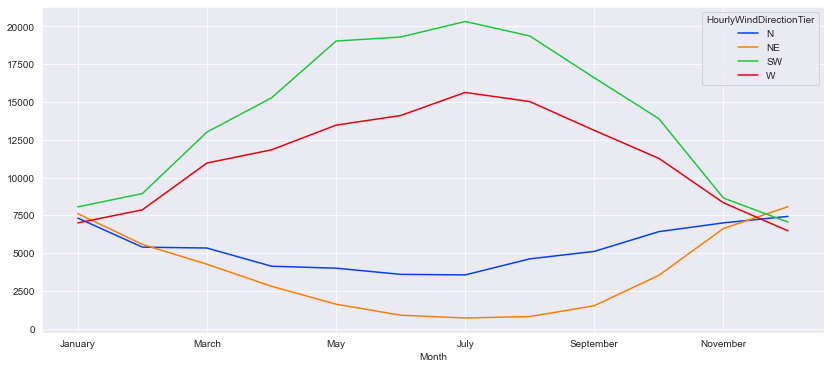

In [54]:
pd.crosstab(df.Month,df.HourlyWindDirectionTier).loc[:,['N','NE','SW','W']].plot(figsize=(14,6))
plt.show()

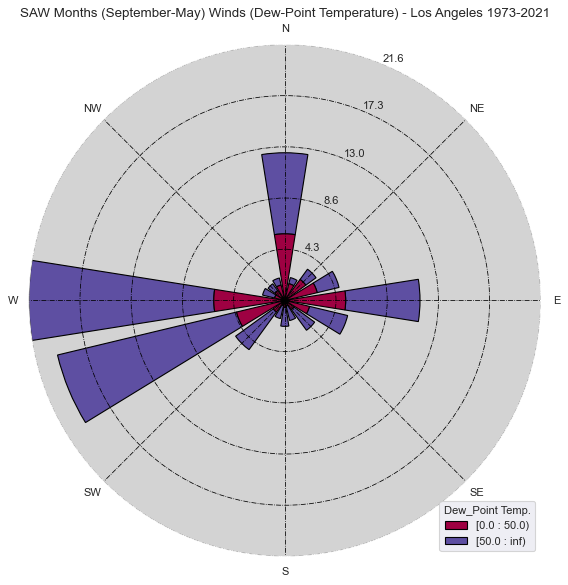

In [61]:
# plot windroses for SAW months - Dewpoint
bins_Range = np.arange(0, 75, 50)
ax = WindroseAxes.from_ax()
ax.bar(dfSAW.HourlyWindDirection,
       dfSAW.HourlyDewPointTemperature,
       normed=True,
       opening=0.8,
       edgecolor='black',
       bins=bins_Range,
       cmap=cm.Spectral)
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
plt.title(
    'SAW Months (September-May) Winds (Dew-Point Temperature) - Los Angeles 1973-2021'
)
ax.set_legend()
ax.set_facecolor("lightgrey")
plt.grid(color='black', linestyle='-.', linewidth=0.7)
ax.legend(loc=4, title="Dew_Point Temp.")
plt.show()

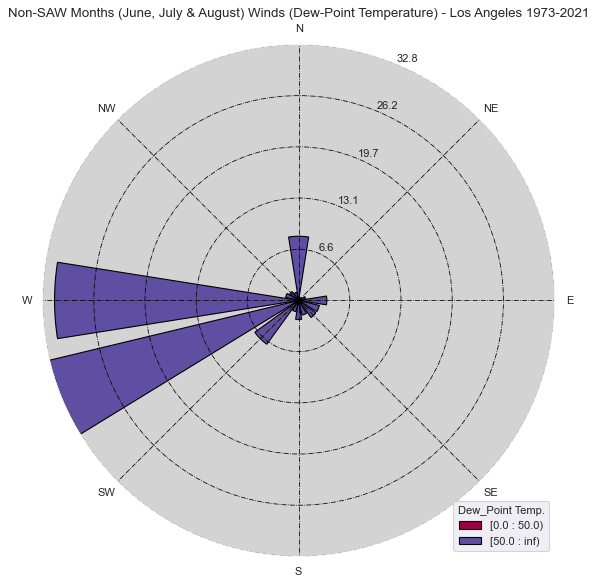

In [62]:
# plot windroses for NSAW months - DewPoint
bins_Range = np.arange(0, 75, 50)
ax = WindroseAxes.from_ax()
ax.bar(dfNSAW.HourlyWindDirection,
       dfNSAW.HourlyDewPointTemperature,
       normed=True,
       opening=0.8,
       edgecolor='black',
       bins=bins_Range,
       cmap=cm.Spectral)
ax.set_xticklabels(['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
plt.title(
    'Non-SAW Months (June, July & August) Winds (Dew-Point Temperature) - Los Angeles 1973-2021'
)
ax.set_legend()
ax.set_facecolor("lightgrey")
ax.grid(color='black', linestyle='-.', linewidth=0.7)
ax.legend(loc=4, title="Dew_Point Temp.")
plt.show()

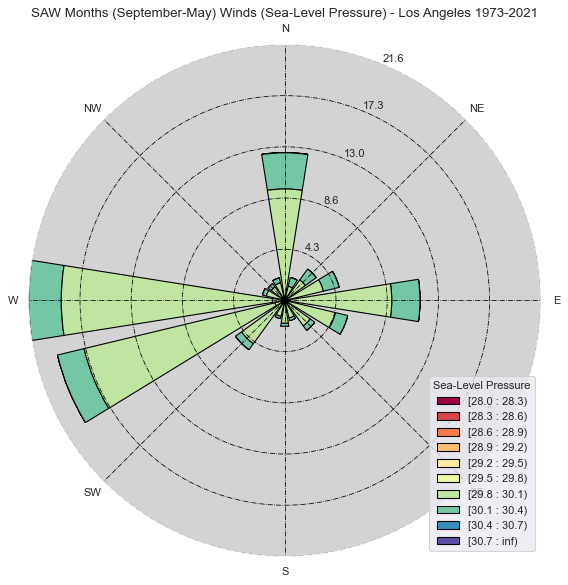

In [63]:
# plot windroses for SAW months - Pressure
bins_Range = np.arange(28, 31, 0.3)
ax = WindroseAxes.from_ax()
ax.bar(dfSAW.HourlyWindDirection, dfSAW.HourlySeaLevelPressure, normed=True, opening=0.8, edgecolor='black', bins=bins_Range, cmap=cm.Spectral)
ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'])
plt.title('SAW Months (September-May) Winds (Sea-Level Pressure) - Los Angeles 1973-2021')
ax.set_legend()
ax.set_facecolor("lightgrey")
plt.grid(color='black', linestyle='-.', linewidth=0.7)
ax.legend(loc=4,title="Sea-Level Pressure")
plt.show()

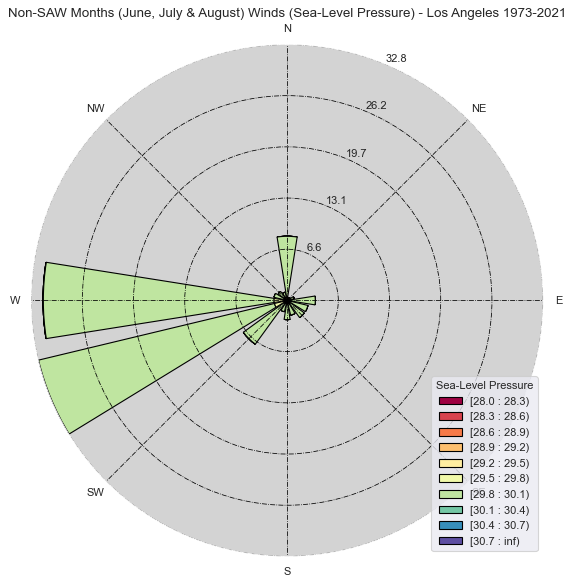

In [64]:
# plot windroses for NSAW months - Pressure
bins_Range = np.arange(28, 31, 0.3)
ax = WindroseAxes.from_ax()
ax.bar(dfNSAW.HourlyWindDirection, dfNSAW.HourlySeaLevelPressure, normed=True, opening=0.8, edgecolor='black', bins=bins_Range, cmap=cm.Spectral)
ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'])
plt.title('Non-SAW Months (June, July & August) Winds (Sea-Level Pressure) - Los Angeles 1973-2021')
ax.set_legend()
ax.set_facecolor("lightgrey")
ax.grid(color='black', linestyle='-.', linewidth=0.7)
ax.legend(loc=4,title="Sea-Level Pressure")
plt.show()

In [13]:
seed=1234
# Create subset blocks
# Equal proportions of each wind(NE and non-NE) extracted from each of the SAW months

# Northeast Winds - Nine SAW Months
NEjan = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "January")].sample(n=800, random_state= seed)
NEfeb = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "February")].sample(n=800, random_state= seed)
NEmar = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "March")].sample(n=800, random_state= seed)
NEapr = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "April")].sample(n=800, random_state= seed)
NEmay = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "May")].sample(n=800, random_state= seed)
NEsep = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "September")].sample(n=800, random_state= seed)
NEoct = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "October")].sample(n=800, random_state= seed)
NEnov = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "November")].sample(n=800, random_state= seed)
NEdec = dfSAW[(dfSAW.HourlyWindDirectionTier == "NE") & (dfSAW.Month== "December")].sample(n=800, random_state= seed)

# Non-Northeast Winds - Nine SAW Months
nNEjan = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "January")].sample(n=800, random_state= seed)
nNEfeb = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "February")].sample(n=800, random_state= seed)
nNEmar = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "March")].sample(n=800, random_state= seed)
nNEapr = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "April")].sample(n=800, random_state= seed)
nNEmay = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "May")].sample(n=800, random_state= seed)
nNEsep = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "September")].sample(n=800, random_state= seed)
nNEoct = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "October")].sample(n=800, random_state= seed)
nNEnov = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "November")].sample(n=800, random_state= seed)
nNEdec = dfSAW[(dfSAW.HourlyWindDirectionTier !="NE") & (dfSAW.Month== "December")].sample(n=800, random_state= seed)

# Combine the NE and non-NE blocks
subsetNE = pd.concat([NEjan,NEfeb,NEmar,NEapr,NEmay,NEsep,NEoct,NEnov,NEdec])
subsetnNE = pd.concat([nNEjan,nNEfeb,nNEmar,nNEapr,nNEmay,nNEsep,nNEoct,nNEnov,nNEdec])

# replace all wind directions in subsetnNE to nonNE
subsetnNE.loc[:, 'HourlyWindDirectionTier'] = 'non-NE'

subsetNE.loc[:,['HourlyDewPointTemperature', 'HourlySeaLevelPressure','HourlyWindSpeed','Year','Month','Hour']].describe()

,HourlyDewPointTemperature,HourlySeaLevelPressure,HourlyWindSpeed,Year,Hour
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,45.414306,30.015218,5.564861,1995.976806,7.179167
std,12.143063,0.125365,2.691266,13.754344,6.395417
min,-7.000000,29.410000,0.000000,1973.000000,0.000000
25%,39.000000,29.930000,3.000000,1984.000000,3.000000
50%,48.000000,30.010000,5.000000,1997.000000,5.000000
75%,54.000000,30.100000,7.000000,2007.000000,9.000000
max,71.000000,30.460000,29.000000,2021.000000,23.000000


In [14]:
subsetnNE.loc[:,['HourlyDewPointTemperature', 'HourlySeaLevelPressure','HourlyWindSpeed','Year','Month','Hour']].describe()

,HourlyDewPointTemperature,HourlySeaLevelPressure,HourlyWindSpeed,Year,Hour
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,50.293333,29.996560,7.414167,1998.259306,12.088750
std,9.700777,0.115604,4.861764,13.433816,6.970462
min,-2.000000,29.390000,0.000000,1973.000000,0.000000
25%,47.000000,29.920000,5.000000,1987.000000,6.000000
50%,52.000000,30.000000,7.000000,2000.000000,12.000000
75%,57.000000,30.070000,10.000000,2009.000000,18.000000
max,70.000000,30.470000,48.000000,2021.000000,23.000000


# Statistical Analysis of Data

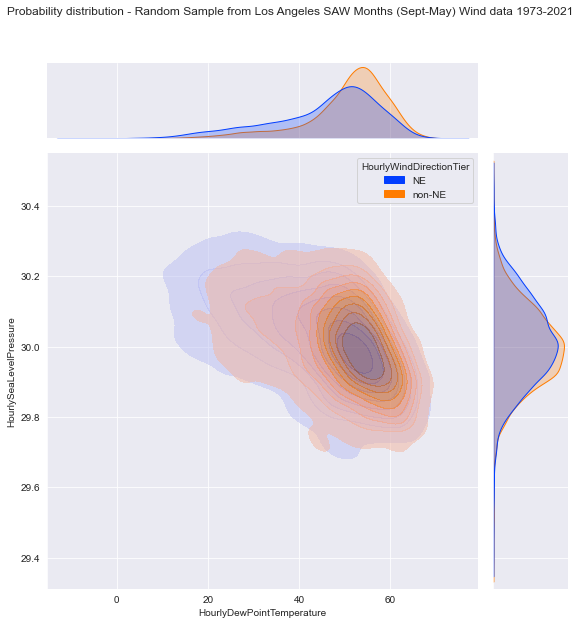

In [15]:
## Testing for Normality

#  visualize the probability distribution of SAW - NE and nNE samples in a single plot.
# Plotting the KDE Plot
# 2D density + marginal distribution:
sns.set_style("darkgrid")
sns.jointplot(data=pd.concat([subsetNE,subsetnNE]), x='HourlyDewPointTemperature', 
              y='HourlySeaLevelPressure', hue='HourlyWindDirectionTier', kind='kde',
              fill=True, joint_kws={'alpha': 0.5}, height=8)
plt.suptitle("Probability distribution - Random Sample from Los Angeles SAW Months (Sept-May) Wind data 1973-2021",y=1.08) # y= some height>1
plt.show()

In [16]:
# Implementing a two-sample t-test for dewpoint temp, drybulb temp, and sealevel pressure for the SAW months
# Large sample sizes - Importance of normality is relaxed
from scipy import stats
print(stats.ttest_ind(subsetNE['HourlyDewPointTemperature'],subsetnNE['HourlyDewPointTemperature'],equal_var=False))

Ttest_indResult(statistic=-26.63715769153193, pvalue=1.8282121233262885e-152)


In [17]:
print(stats.ttest_ind(subsetNE['HourlySeaLevelPressure'],subsetnNE['HourlySeaLevelPressure'],equal_var=False))

Ttest_indResult(statistic=9.28401547824359, pvalue=1.8629687499186728e-20)


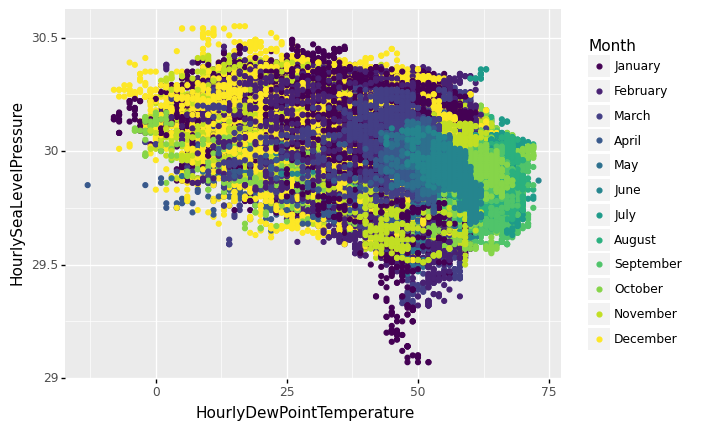

<ggplot: (105258209274)>

In [46]:
p9.ggplot(data = df) + p9.aes(x='HourlyDewPointTemperature', y='HourlySeaLevelPressure', color='Month') + p9.geom_point()

In [49]:
#Pearson correlation SAW months
stats.pearsonr(df['HourlyDewPointTemperature'], df['HourlySeaLevelPressure'])

(-0.47749824933753704, 0.0)

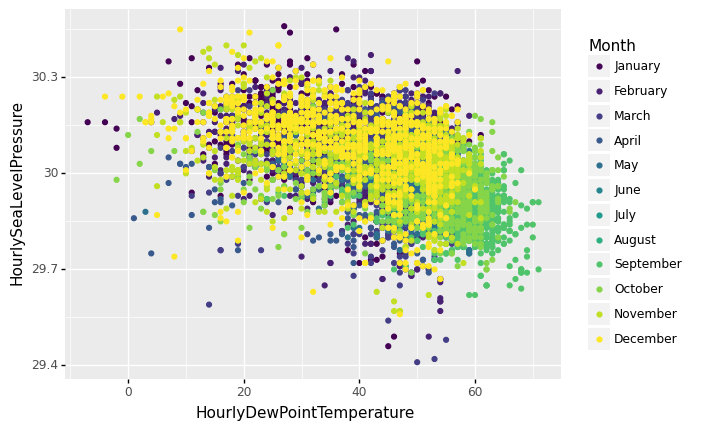

<ggplot: (105246968751)>

In [18]:
p9.ggplot(data = subsetNE) + p9.aes(x='HourlyDewPointTemperature', y='HourlySeaLevelPressure', color='Month') + p9.geom_point()

In [19]:
#Pearson correlation SAW months
stats.pearsonr(subsetNE['HourlyDewPointTemperature'], subsetNE['HourlySeaLevelPressure'])

(-0.49274462926164697, 0.0)

Two-way ANOVA
How does the Dewpoint temperature or Sea-Level Pressure vary between NE and nNE winds in LA and for all the SAW 
months? We will use a two-way ANOVA to check for the 
presence of significant variation in the dewpoint temperature and sea level pressure. 
A two-way ANOVA will allow you to see which of these two factors, Wind Direction and Month, 
have a significant effect on Dewpoint temperature. 
We will implement the ANOVA with interactive effects to also see if wind direction and
month are interactive - dependent on the other.

In [20]:
## Dew-Point Temperature
# Run the ANOVA
import statsmodels as sm
model = sm.api.formula.ols('HourlyDewPointTemperature ~ Month + HourlyWindDirectionTier + HourlyWindDirectionTier:Month', data = pd.concat([subsetNE,subsetnNE])).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

                                     sum_sq       df           F  \
Month                          6.494904e+05     11.0  669.124079   
HourlyWindDirectionTier        8.569768e+04      1.0  971.170975   
HourlyWindDirectionTier:Month  1.645971e+04     11.0   16.957277   
Residual                       1.269091e+06  14382.0         NaN   

                                      PR(>F)  
Month                           0.000000e+00  
HourlyWindDirectionTier        2.239050e-206  
HourlyWindDirectionTier:Month   2.534112e-25  
Residual                                 NaN  


In [21]:
## Pressure
# Run the ANOVA
import statsmodels as sm
model = sm.api.formula.ols('HourlySeaLevelPressure ~ Month + HourlyWindDirectionTier + HourlyWindDirectionTier:Month', data = pd.concat([subsetNE,subsetnNE])).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

                                   sum_sq       df           F        PR(>F)
Month                           80.203804     11.0  686.129131  0.000000e+00
HourlyWindDirectionTier          1.253280      1.0  117.937461  2.285140e-27
HourlyWindDirectionTier:Month    0.560239     11.0    4.792748  6.628746e-06
Residual                       152.832496  14382.0         NaN           NaN


In [22]:
dfSAW['Century'] = 0
for i in range(0, len(dfSAW)):
    if(dfSAW['Year'][i] > 1999):
        dfSAW['Century'][i] = 21
    else: 
        dfSAW['Century'][i] = 20

In [23]:
dfSAW.Century = dfSAW.Century.apply(str)

In [24]:
CenturyLabels = ['20', '21']
dfSAW['Century'] = pd.Categorical(dfSAW['Century'], categories=CenturyLabels, ordered=True)

In [25]:
mowd= dfSAW.groupby(['HourlyWindDirectionTier','Month','Century'])\
    [['HourlySeaLevelPressure','HourlyDewPointTemperature','HourlyWindSpeed','HourlyDryBulbTemperature']].agg(['mean','std'])
mowdNE = mowd.loc['NE',:].dropna()

mowdNE

HourlySeaLevelPressure           HourlyDewPointTemperature  \
                                    mean       std                      mean   
Month     Century                                                              
January   20                   30.084318  0.118569                 39.659194   
          21                   30.107534  0.112632                 38.492500   
February  20                   30.071432  0.132208                 41.033594   
          21                   30.056293  0.128978                 41.234686   
March     20                   30.022853  0.122896                 44.919061   
          21                   30.027902  0.118710                 43.623817   
April     20                   29.993024  0.090722                 46.843452   
          21                   29.998282  0.086389                 46.415412   
May       20                   29.946188  0.070482                 52.421310   
          21                   29.939967  0.073994                 50.923333   
September 20                   29.896756  0.085961                 58.430407   
          21                   29.883980  0.060524                 57.515306   
October   20                   29.969615  0.085021                 50.043662   
          21                   29.952413  0.096850                 50.116726   
November  20                   30.059832  0.110214                 41.689765   
          21                   30.048053  0.106976                 40.473100   
December  20                   30.089862  0.128681                 37.255159   
          21                   30.091028  0.128207                 38.261098   

                             HourlyWindSpeed            \
                         std            mean       std   
Month     Century                                        
January   20       11.124479        5.969882  3.221917   
          21       12.148166        6.020000  2.517505   
February  20       10.799032        6.260274  3.392454   
          21       10.557812        6.561257  3.282014   
March     20        8.166184        5.665318  2.797499   
          21        9.650453        5.958264  2.758654   
April     20        8.063766        5.719643  2.852222   
          21        8.301188        5.394154  2.208061   
May       20        4.805352        4.959922  2.689648   
          21        7.528075        4.991667  1.801019   
September 20        6.273592        4.709850  2.349516   
          21        6.497655        4.857143  1.852297   
October   20       11.526328        5.219718  2.689259   
          21       12.056753        5.081851  1.916636   
November  20       12.728664        5.455490  2.769688   
          21       12.997251        5.751475  2.446941   
December  20       12.665368        5.985813  3.100380   
          21       12.883153        6.191589  2.712342   

                  HourlyDryBulbTemperature            
                                      mean       std  
Month     Century                                     
January   20                     54.521286  6.694769  
          21                     55.716563  7.342893  
February  20                     54.762883  6.589839  
          21                     54.725537  6.650044  
March     20                     54.891542  5.820421  
          21                     55.676683  6.574786  
April     20                     56.725000  6.599716  
          21                     57.008857  6.108063  
May       20                     59.000978  4.814464  
          21                     60.155000  5.747408  
September 20                     66.934690  5.788614  
          21                     66.144558  4.933063  
October   20                     63.513615  6.611124  
          21                     63.269039  6.782661  
November  20                     58.615139  7.098504  
          21                     59.341895  7.591347  
December  20                     55.069218  6.619974  
          21      

## Dew-Point 

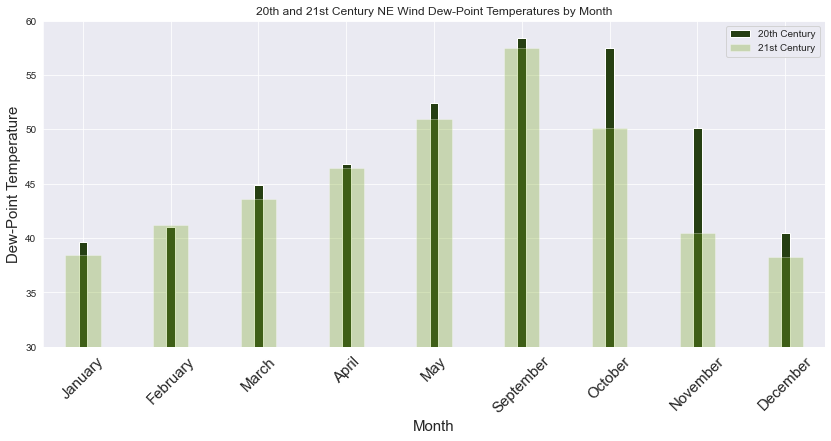

In [26]:
labels=['January', 'February', 'March', 'April', 'May','September', 'October', 'November', 'December']
w20 = 0.1
w21 = 0.4
plt.figure(figsize=(14, 6))
mowdNE.iloc[[0,2,4,6,8,10,11,13,15],2].plot(kind='bar', label='20th Century', width=w20,color='#263F13')
mowdNE.iloc[[1,3,5,7,9,11,13,15,17],2].plot(kind='bar', color='#77A61D', label='21st Century', width=w21, alpha=0.3)
plt.xlabel('Month',size=15)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8], labels=labels,rotation=45,size=15)
plt.ylabel('Dew-Point Temperature', size=15)
plt.ylim(30,60)
plt.title('20th and 21st Century NE Wind Dew-Point Temperatures by Month')
plt.legend()
plt.show()

In [27]:
# NE SAW Winds - Dewpoint
# Run the ANOVA
import statsmodels as sm
model = sm.api.formula.ols('HourlyDewPointTemperature ~ Month + Century', data = dfSAW[dfSAW.HourlyWindDirectionTier=='NE']).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

                sum_sq       df            F    PR(>F)
Month     1.469793e+06     11.0  1070.789668  0.000000
Century   1.872256e+03      1.0    15.003965  0.000107
Residual  5.197508e+06  41652.0          NaN       NaN


## Pressure 

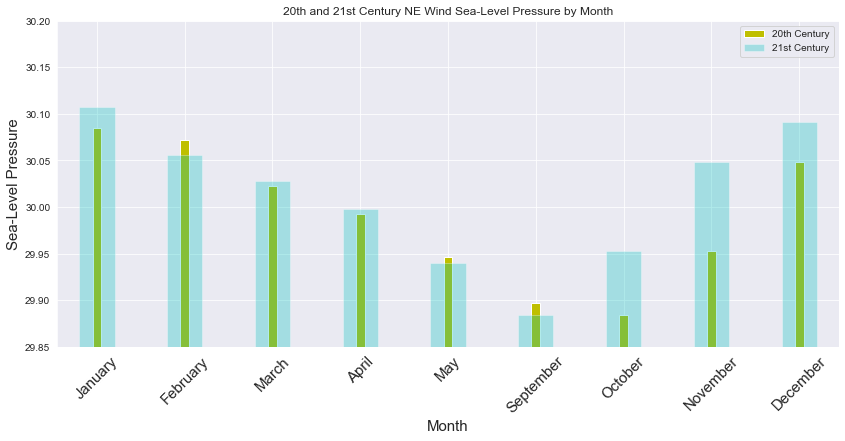

In [28]:
labels=['January', 'February', 'March', 'April', 'May','September', 'October', 'November', 'December']
w20 = 0.1
w21 = 0.4
plt.figure(figsize=(14, 6))
mowdNE.iloc[[0,2,4,6,8,10,11,13,15],0].plot(kind='bar', label='20th Century', width=w20,color='y')
mowdNE.iloc[[1,3,5,7,9,11,13,15,17],0].plot(kind='bar', color='c', label='21st Century', width=w21, alpha=0.3)
plt.xlabel('Month',size=15)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8], labels=labels,rotation=45,size=15)
plt.ylabel('Sea-Level Pressure', size=15)
plt.ylim(29.85,30.2)
plt.title('20th and 21st Century NE Wind Sea-Level Pressure by Month')
plt.legend()
plt.show()

In [29]:
# NE SAW Winds - Pressure
# Run the ANOVA
import statsmodels as sm
model = sm.api.formula.ols('HourlySeaLevelPressure ~ Month + Century', data = dfSAW[dfSAW.HourlyWindDirectionTier=='NE']).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

              sum_sq       df            F  PR(>F)
Month     168.543073     11.0  1176.285615  0.0000
Century     0.005482      1.0     0.420885  0.5165
Residual  542.551909  41652.0          NaN     NaN


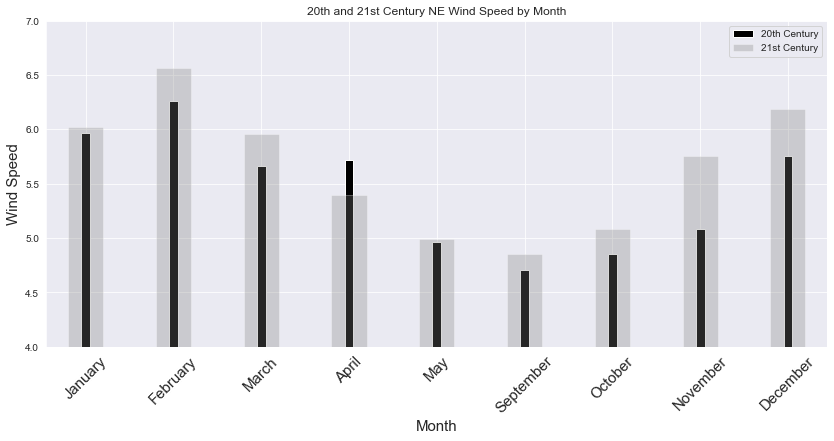

In [30]:
labels=['January', 'February', 'March', 'April', 'May','September', 'October', 'November', 'December']
w20 = 0.1
w21 = 0.4
plt.figure(figsize=(14, 6))
mowdNE.iloc[[0,2,4,6,8,10,11,13,15],4].plot(kind='bar', label='20th Century', width=w20,color='black')
mowdNE.iloc[[1,3,5,7,9,11,13,15,17],4].plot(kind='bar', color='grey', label='21st Century', width=w21, alpha=0.3)
plt.xlabel('Month',size=15)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8], labels=labels,rotation=45,size=15)
plt.ylabel('Wind Speed', size=15)
plt.ylim(4,7)
plt.title('20th and 21st Century NE Wind Speed by Month')
plt.legend()
plt.show()

In [31]:
# NE SAW Winds - Wind Speed
# Run the ANOVA
import statsmodels as sm
model = sm.api.formula.ols('HourlyWindSpeed ~ Month + Century', data = dfSAW[dfSAW.HourlyWindDirectionTier=='NE']).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

                 sum_sq       df           F         PR(>F)
Month      10141.094375     11.0  115.000678  3.822519e-191
Century      201.779607      1.0   25.170134   5.270435e-07
Residual  333908.594364  41652.0         NaN            NaN


# Data Split

In [32]:
## Split SAW dataframe  into 20th century and 21st dataframes

# 20th Century Data - Fall 1973 to Spring 1999
df20 = dfSAW['1973-09-01':'1999-06-30']

# 21st Century Data - Fall 2000 to Spring 2021
df21 = dfSAW['2000-09-01':'2021-06-30']

## 20th Century NorthEast Winds

In [33]:
mowd20= df20.groupby(['HourlyWindDirectionTier','Month'])[['Month']].agg(['count'])
mowd20NE = mowd20.loc['NE',:].dropna()

mowd20NE= mowd20NE.loc[['January','February','March','April','May','September','October','November','December'],:]
mowd20NE

,Month
,count
Month,
January,4210
February,2929
March,2375
April,1615
May,998
September,903
October,1994
November,3606


In [34]:
mowd20ALL=df20.groupby(['Month'])[['Month']].agg(['count']).loc[['January','February','March','April','May','September','October','November','December'],:]
mowd20ALL

,Month
,count
Month,
January,23425
February,21579
March,23284
April,22442
May,23638
September,23129
October,23955
November,22364


In [35]:
mowd20NEALL = pd.concat((mowd20NE,mowd20ALL),axis=1)
mowd20NEALL

Month       
          count  count
Month                 
January    4210  23425
February   2929  21579
March      2375  23284
April      1615  22442
May         998  23638
September   903  23129
October    1994  23955
November   3606  22364
December   4458  23011

In [36]:
mowd20NEALL_ct= mowd20NEALL.iloc[0:9,0]/mowd20NEALL.iloc[0:9,1]
mowd20NEALL_ct

Month
January      0.179723
February     0.135734
March        0.102001
April        0.071963
May          0.042220
September    0.039042
October      0.083239
November     0.161241
December     0.193733
Name: (Month, count), dtype: float64

## 21st Century NorthEast Winds

In [37]:
mowd21= df21.groupby(['HourlyWindDirectionTier','Month'])[['Month']].agg(['count'])
mowd21NE = mowd21.loc['NE',:].dropna()

mowd21NE= mowd21NE.loc[['January','February','March','April','May','September','October','November','December'],:]
mowd21NE

,Month
,count
Month,
January,3007
February,2352
March,1637
April,1058
May,546
September,588
October,1405
November,2881


In [38]:
mowd21ALL=df21.groupby(['Month'])[['Month']].agg(['count']).loc[['January','February','March','April','May','September','October','November','December'],:]
mowd21ALL

,Month
,count
Month,
January,23715
February,21810
March,23945
April,22713
May,23995
September,23530
October,24390
November,23346


In [39]:
mowd21NEALL = pd.concat((mowd21NE,mowd21ALL),axis=1)
mowd21NEALL

Month       
          count  count
Month                 
January    3007  23715
February   2352  21810
March      1637  23945
April      1058  22713
May         546  23995
September   588  23530
October    1405  24390
November   2881  23346
December   3424  24132

In [40]:
mowd21NEALL_ct= mowd21NEALL.iloc[0:9,0]/mowd21NEALL.iloc[0:9,1]
mowd21NEALL_ct

Month
January      0.126797
February     0.107840
March        0.068365
April        0.046581
May          0.022755
September    0.024989
October      0.057606
November     0.123404
December     0.141886
Name: (Month, count), dtype: float64

# Comparison of 20th and 21st Century NE Winds

## Wind Count Comparisions

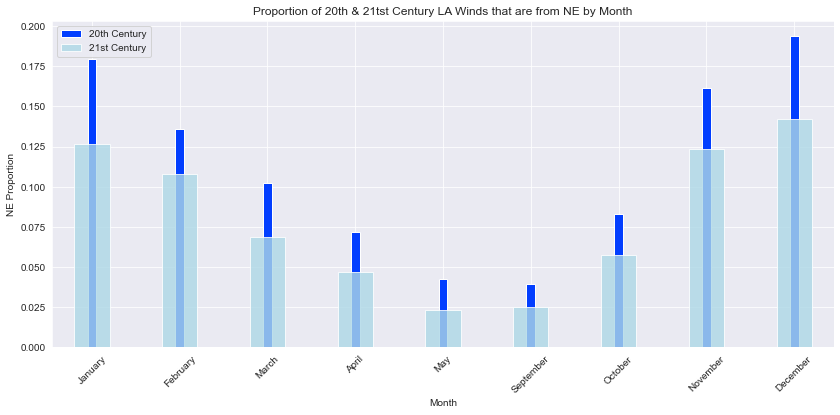

In [41]:
w20 = 0.1
w21 = 0.4
plt.figure(figsize=(14, 6))
mowd20NEALL_ct.plot(kind='bar', label='20th Century', width=w20)
mowd21NEALL_ct.plot(kind='bar', color='lightblue', label='21st Century', width=w21, alpha=0.8)
plt.xticks(rotation=45)
plt.ylabel('NE Proportion')
plt.title('Proportion of 20th & 21tst Century LA Winds that are from NE by Month')
plt.legend()
plt.show()